In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# conn = engine.connect()

In [6]:
# reflect an existing database into a new model - 10-Ins_Flask_with_ORM
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [8]:
# View all of the classes that automap found - 11-Stu_Chinook_Database_Analysis
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()


['measurement', 'station']

In [32]:
# Save references to each table -- 10-Ins_Flask_with_ORM
Measurement = Base.classes.measurement
Station = Base.classes.station



In [33]:
# Create our session (link) from Python to the DB - 10-Ins_Flask_with_ORM
session = Session(engine)


# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set. - 03-Stu_Dates
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

The most recent date:  ('2017-08-23',)
Query Date one year from the last date:  2016-08-23


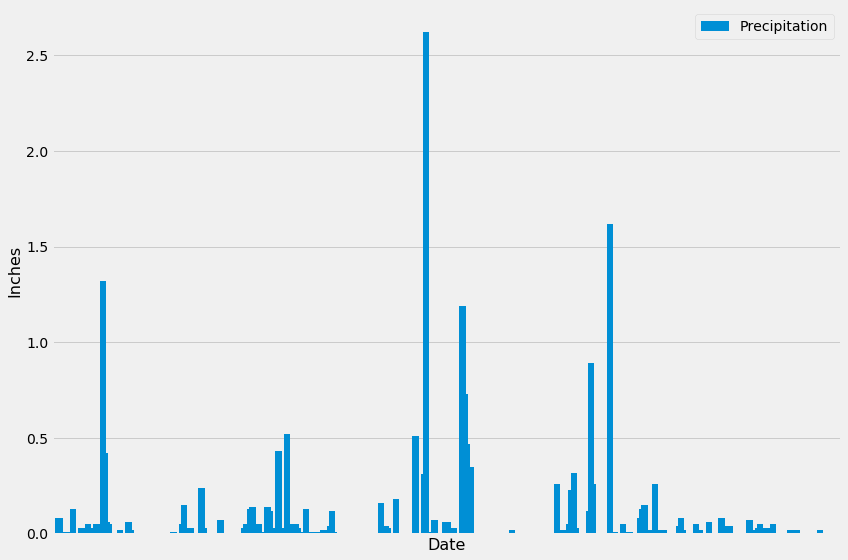

In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. - 03-Stu_Dates and 02-Ins_Dates
# Starting from the most recent data point in the database. 
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("The most recent date: ", recent)
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date one year from the last date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, (Measurement.prcp)).\
                    filter(Measurement.date >= query_date).\
                    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_results = pd.DataFrame(results, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
date_df = df_results.sort_values('Date')


# Use Pandas Plotting with Matplotlib to plot the data
ax = date_df.plot(kind='bar', width=3, figsize=(12,8))
ax.set_xticks([])
ax.grid(True)
date_df.set_index('Date', inplace=True)
plt.ylabel("Inches", size=16)
plt.xlabel("Date", size=16)
plt.tight_layout()
plt.show()

In [67]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_results = session.query(Measurement.prcp)
                    
df = pd.DataFrame(df_results, columns=['Precipitation'])
df_stats = df.describe()
df_stats

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

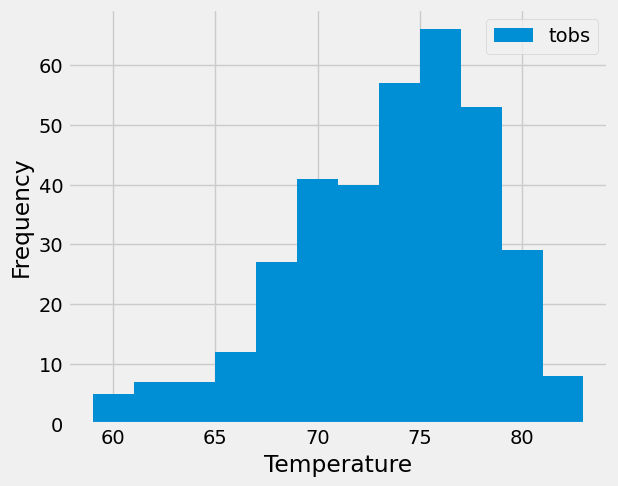

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()